In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Acceso a datos de radar de Colombia en AWS
<div>
<img src="./pictures/IDEAM_AWS.PNG" alt="drawing" width="900"/>
</div>


## Repositorio de datos de radar en AWS


<!-- 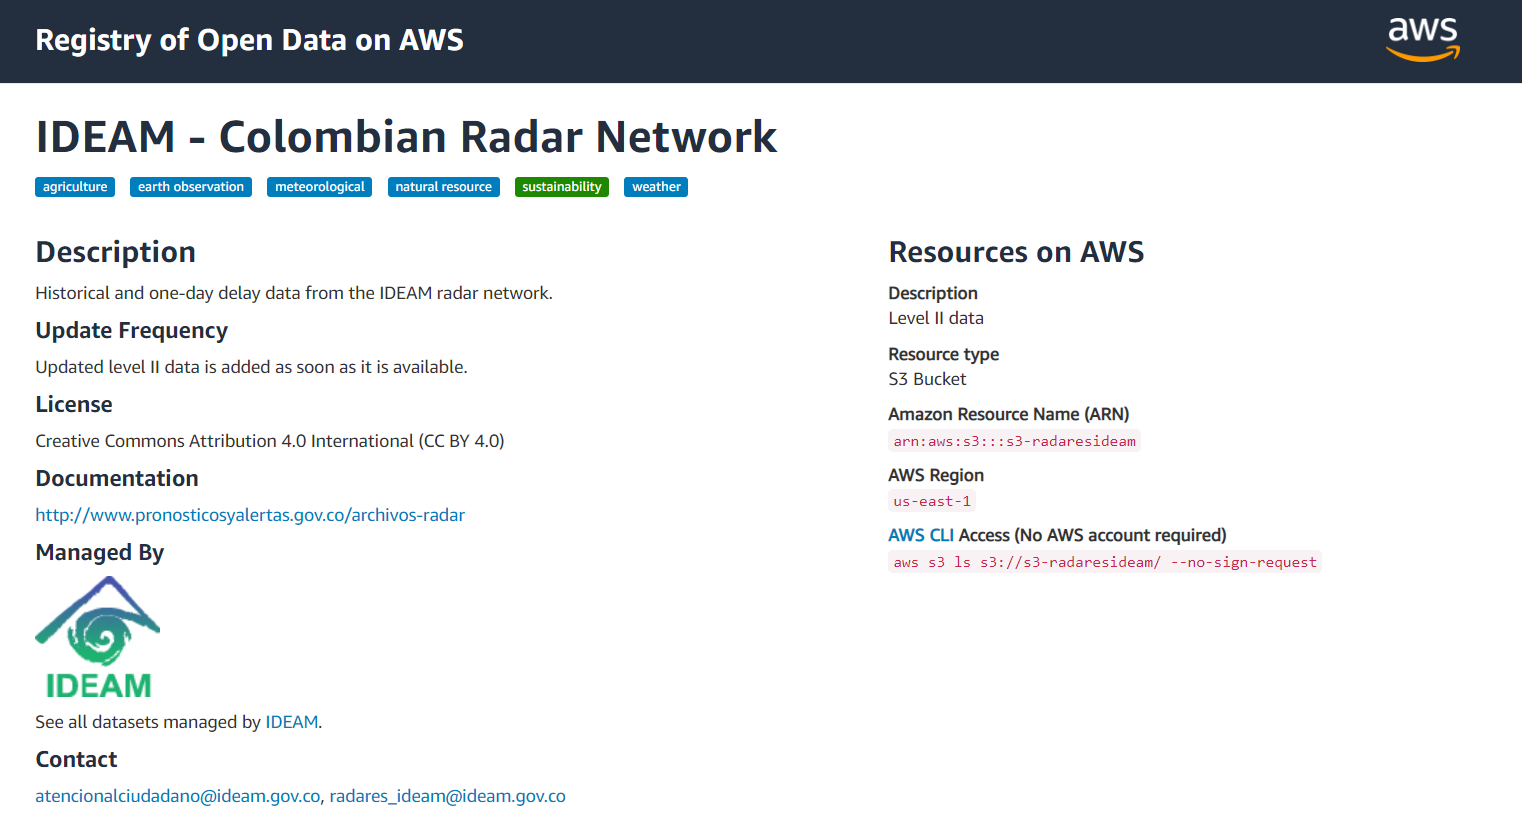 -->

<div>
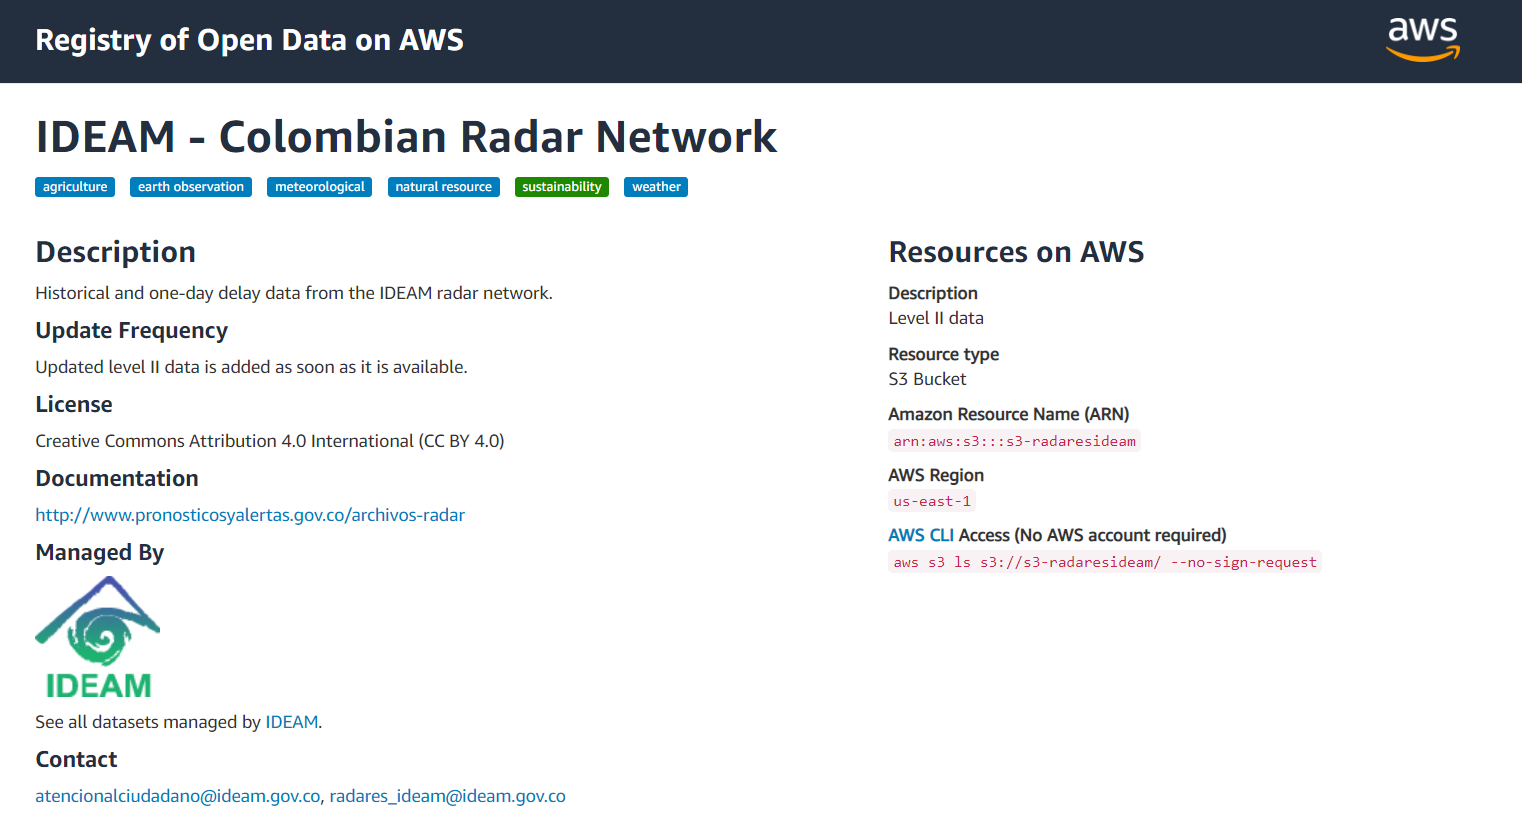
</div>

## Usando el comando aws Client 


In [ ]:
!aws s3 ls s3://s3-radaresideam/ --no-sign-request

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/ --no-sign-request

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/ --no-sign-request

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/Guaviare/ --no-sign-request
# !aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/Barrancabermeja/ --no-sign-request

# Usando Python

## Librerias

In [ ]:
import boto3
import botocore
from botocore.client import Config
import warnings
import pyart
import os
import glob
import matplotlib.pyplot as plt
from datetime import datetime
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Conexión bucket (repositorio de AWS)

In [ ]:
s3 = boto3.resource('s3', config=Config(signature_version=botocore.UNSIGNED, \
                                    user_agent_extra='Resource'))
bucket = s3.Bucket('s3-radaresideam')\

bucket

## Crear consulta acorde a la estructura del bucket

#### /Año/Mes/Dia/Radar/Archivo/

In [ ]:
# objeto de fecha
d = datetime(2021, 10, 3, 12)
radar_station = 'Guaviare'

In [ ]:
# Creando una consulta tipo
prefix = f'l2_data/{d:%Y}/{d:%m}/{d:%d}/{radar_station}/{radar_station[:3].upper()}{d:%y%m%d%H}'
prefix

In [ ]:
!aws s3 ls s3://s3-radaresideam/l2_data/2021/10/03/Barrancabermeja/ --no-sign-request

## Archivos encontrados en el bucket

In [ ]:
objects = []

for obj in bucket.objects.filter(Prefix=prefix):
    print(obj.key)
    objects.append(obj)

## Descarga los archivos encontrados en el bucket

In [ ]:
# Archivos ya fueron descargados - no ejecutar
for obj in objects:
    _, filename = os.path.split(obj.key)
    path_save = f'./data/{filename}'
    bucket.download_file(obj.key, path_save)


In [ ]:
%%bash
ls -ltrh data

# Graficos Usando PyArt


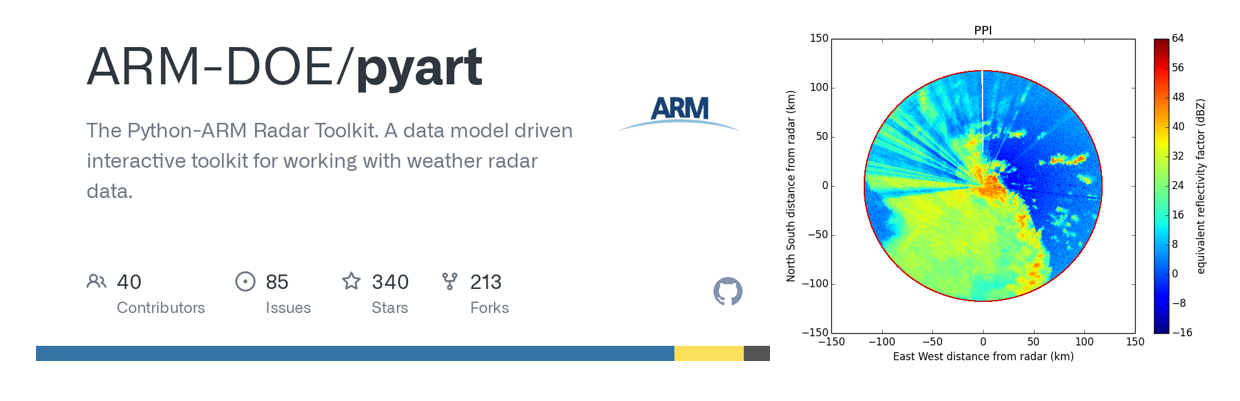

## https://github.com/ARM-DOE/pyart

In [ ]:
%%html
<iframe src="https://arm-doe.github.io/pyart/source/auto_examples/index.html#mapping-examples" width="1500" height="500"></iframe>

### Objeto "radar" usando pyart.io.read

In [ ]:
list_files = glob.glob(f'data/{radar_station[:3].upper()}*')
list_files[0]

In [ ]:
radar = pyart.io.read(list_files[0])

### Información contenida dentro del archivo

In [ ]:
radar.info('compact')

## Variables polarimétricas

In [ ]:
radar.fields.keys()

### Plot usando pyart.io.graph

In [ ]:
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
display.plot('reflectivity', 0, vmin=0, vmax=70, cmap='pyart_NWSRef')
display.plot_cross_hair(5.)
plt.show()

### Plots generados en IDEAM

<!-- 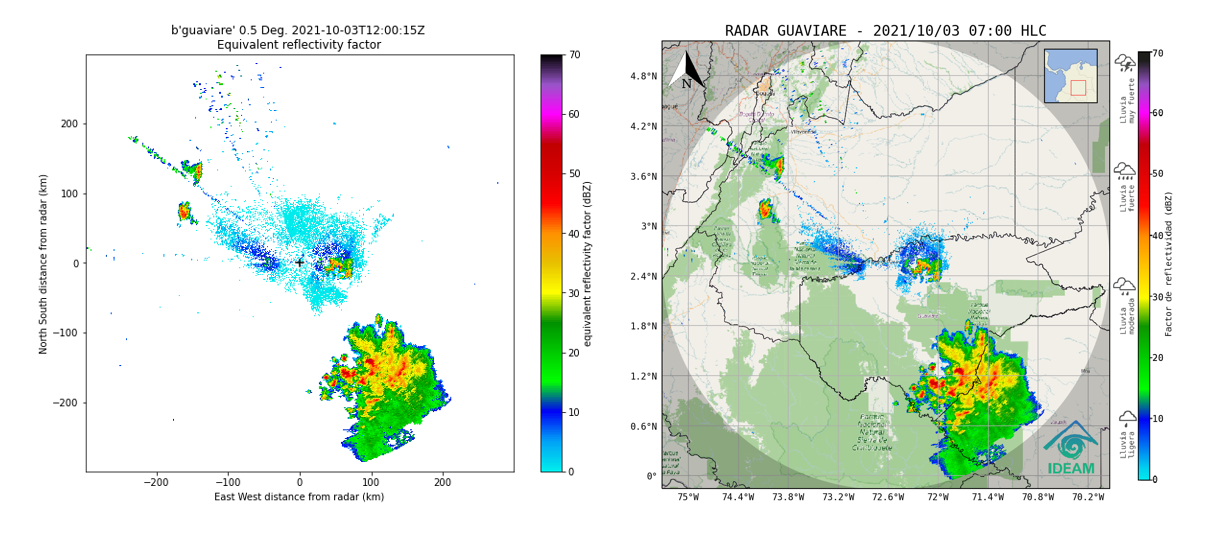 -->
<div>
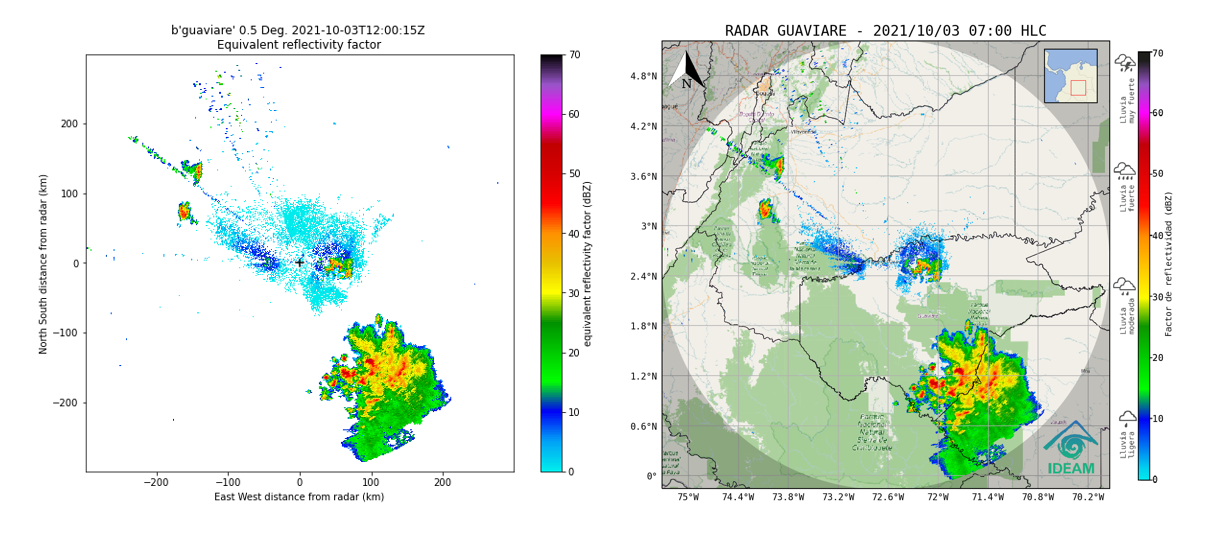
</div>